# Import

In [ ]:
!pip install contextily utm;

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 26.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import seaborn as sns
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import contextily as cx
import utm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
MY_PATH = '/content/drive/MyDrive/EEPS 1340 Project/EEPS 1340 Project Data/'

Mounted at /content/drive


# Initial Analysis

We first need to load the dataset into this notebook. This will help us get a sense of all the features and what one observation represents.

In [ ]:
df = pd.read_csv(MY_PATH+ 'fire_data.csv')
df

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
0,102649,STAT,2015,EOA,Klamath-Lake,Klamath,15-981082-16,Bass 497,B,3.20,...,Does Not Apply - Eastern OR,09/02/2015 05:00:00 PM,09/02/2015 05:05:00 PM,09/02/2015 05:00:00 PM,09/02/2015 11:00:00 PM,09/05/2015 12:00:00 AM,10/13/2015 08:39:00 AM,98,981,082
1,131239,STAT,2022,EOA,Walker Range - WRFPA,Crescent,22-991220-23,Hay Fire,A,NaN,...,NaN,NaN,08/16/2022 06:56:00 PM,NaN,NaN,08/18/2022 12:00:00 AM,08/18/2022 09:11:00 AM,99,991,220
2,58256,STAT,2000,EOA,Central Oregon,John Day,00-952011-01,Slick Ear #2,B,0.75,...,Does Not Apply - Eastern OR,07/18/2000 07:00:00 PM,07/19/2000 01:20:00 PM,07/19/2000 01:15:00 PM,07/20/2000 12:50:00 AM,07/20/2000 09:13:00 AM,11/14/2000 09:16:00 AM,95,952,011
3,59312,STAT,2000,EOA,Northeast Oregon,La Grande,00-971024-01,Woodley,C,80.00,...,Does Not Apply - Eastern OR,08/24/2000 05:30:00 AM,08/24/2000 01:07:00 PM,08/24/2000 01:07:00 PM,09/01/2000 09:30:00 PM,08/29/2000 03:59:00 PM,12/21/2000 04:22:00 PM,97,971,024
4,61657,STAT,2001,SOA,Southwest Oregon,Grants Pass,01-712133-02,QUEENS BRANCH,A,0.10,...,Lvl 3 Restricted Shutdown,08/10/2001 05:40:00 PM,08/10/2001 05:47:00 PM,08/10/2001 05:45:00 PM,08/10/2001 06:30:00 PM,08/10/2001 06:42:00 PM,08/17/2001 11:45:00 AM,71,712,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,124548,STAT,2021,EOA,Walker Range - WRFPA,Crescent,21-991258-21,Road 2430,B,0.75,...,Does Not Apply - Eastern OR,06/26/2021 04:00:00 PM,06/26/2021 04:58:00 PM,06/26/2021 04:45:00 PM,06/26/2021 09:58:00 PM,07/01/2021 12:00:00 AM,10/02/2021 03:08:00 PM,99,991,258
23486,132141,STAT,2022,SOA,Western Lane,Veneta,22-781066-23,Spruce Path,A,0.01,...,Lvl 1 Fire Season Only,09/13/2022 11:20:00 AM,09/13/2022 11:20:00 AM,09/13/2022 11:20:00 AM,09/13/2022 12:14:00 PM,09/13/2022 12:00:00 AM,09/19/2022 10:09:00 AM,78,781,066
23487,124065,STAT,2021,EOA,Northeast Oregon,Pendleton,21-973052-21,Bone Canyon,C,67.43,...,Does Not Apply - Eastern OR,06/13/2021 05:22:00 PM,06/14/2021 12:45:00 PM,06/14/2021 12:45:00 PM,06/17/2021 05:10:00 PM,06/14/2021 12:00:00 AM,09/24/2021 01:48:00 PM,97,973,052
23488,131292,STAT,2022,EOA,Northeast Oregon,Pendleton,22-973014-23,Milepost 231,A,0.10,...,Does Not Apply - Eastern OR,08/19/2022 03:09:00 PM,08/19/2022 03:09:00 PM,08/19/2022 03:09:00 PM,08/19/2022 04:41:00 PM,08/19/2022 12:00:00 AM,11/08/2022 11:34:00 AM,97,973,014


This dataset describes the fires in Oregon during the years 2020-2022 on forested grounds for which the Oregon Department of Forestry (ODF) was the primary protection agency (O’Conner 2022). It has features related to location, time and impact. We then printed the shape of the dataset to understand its dimensions.

In [ ]:
print('Dataset shape: ', df.shape)

Dataset shape:  (23490, 38)


This dataset contains 23490 observations and 38 features. We then printed the datypes of the dataset to understand the kinds of data for each feature. This dataset has both numerical and categorical features, which will need to be adapted depending on our choice of model.

In [ ]:
print("\nData types:")
print(df.dtypes)


Data types:
Serial                      int64
FireCategory               object
FireYear                    int64
Area                       object
DistrictName               object
UnitName                   object
FullFireNumber             object
FireName                   object
Size_class                 object
EstTotalAcres             float64
Protected_Acres           float64
HumanOrLightning           object
CauseBy                    object
GeneralCause               object
SpecificCause              object
Cause_Comments             object
Lat_DD                    float64
Long_DD                   float64
LatLongDD                  object
FO_LandOwnType             object
Twn                        object
Rng                        object
Sec                       float64
Subdiv                     object
LandmarkLocation           object
County                     object
RegUseZone                 object
RegUseRestriction          object
Industrial_Restriction     object
I

This has 9 numerical features and 29 categorical features. We then printed the basic statistics to better understand the distribution of our data.

In [ ]:
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
              Serial     FireYear  EstTotalAcres  Protected_Acres  \
count   23490.000000  23490.00000   23411.000000     23490.000000   
mean    90425.933461   2010.80132     270.802503        63.454008   
std     20901.016028      6.73508    6816.736966      1973.577812   
min     57485.000000   2000.00000       0.000000         0.000000   
25%     72508.500000   2005.00000       0.010000         0.010000   
50%     88340.000000   2011.00000       0.100000         0.100000   
75%    107432.500000   2017.00000       0.500000         0.350000   
max    134021.000000   2022.00000  499945.000000    154570.000000   

             Lat_DD       Long_DD           Sec  DistrictCode      UnitCode  
count  23480.000000  23480.000000  23478.000000  23490.000000  23490.000000  
mean      43.718410   -122.258736     18.576753     77.754662    779.371052  
std        1.226385      1.707589     10.439507     14.618857    146.534574  
min       41.089460   -124.983610      1.000000

These statistics give us interesting information such as the standard deviation of estimated total acres burned, the mean of fire years, the minimum and maximum latitude/longitude, and much more. We then printed the column names to have a sense of all the features in the dataset.

In [ ]:
print(df.columns)

Index(['Serial', 'FireCategory', 'FireYear', 'Area', 'DistrictName',
       'UnitName', 'FullFireNumber', 'FireName', 'Size_class', 'EstTotalAcres',
       'Protected_Acres', 'HumanOrLightning', 'CauseBy', 'GeneralCause',
       'SpecificCause', 'Cause_Comments', 'Lat_DD', 'Long_DD', 'LatLongDD',
       'FO_LandOwnType', 'Twn', 'Rng', 'Sec', 'Subdiv', 'LandmarkLocation',
       'County', 'RegUseZone', 'RegUseRestriction', 'Industrial_Restriction',
       'Ign_DateTime', 'ReportDateTime', 'Discover_DateTime',
       'Control_DateTime', 'CreationDate', 'ModifiedDate', 'DistrictCode',
       'UnitCode', 'DistFireNumber'],
      dtype='object')


These are the names of all features within the dataset. This includes Fire Serial Numbers, Fire Years, District Names, General Causes, Fire Ignition Date and Time, Landmark Locations and more. We then printed the  number of unique observations for each feature to help us determine which columns have the most repeated observations.

In [ ]:
for column in df.columns:
  print(f"{column}: {df[column].unique()}")
  print()

Serial: [102649 131239  58256 ... 124065 131292 131287]

FireCategory: ['STAT']

FireYear: [2015 2022 2000 2001 2014 2002 2003 2005 2007 2008 2009 2010 2011 2013
 2016 2017 2018 2019 2020 2021 2004 2006 2012]

Area: ['EOA' 'SOA' 'NOA']

DistrictName: ['Klamath-Lake' 'Walker Range - WRFPA' 'Central Oregon' 'Northeast Oregon'
 'Southwest Oregon' 'Douglas - DFPA' 'West Oregon' 'Astoria'
 'North Cascade' 'South Cascade' 'Forest Grove' 'Coos - CFPA'
 'Western Lane' 'Tillamook']

UnitName: ['Klamath' 'Crescent' 'John Day' 'La Grande' 'Grants Pass' 'DFPA Central'
 'Philomath' 'Dallas' 'Wallowa' 'Astoria' 'Molalla' 'Medford' 'DFPA North'
 'DFPA South' 'Eastern Lane' 'Sweet Home' 'Columbia City' 'Sisters'
 'Santiam' 'Lakeview' 'Coos Bay' 'Veneta' 'Bridge' 'Forest Grove' 'Baker'
 'Pendleton' 'Tillamook' 'Prineville' 'Gold Beach' 'Toledo' 'The Dalles']

FullFireNumber: ['15-981082-16' '22-991220-23' '00-952011-01' ... '21-973052-21'
 '22-973014-23' '22-955070-23']

FireName: ['Bass 497' 'Hay Fire

The features with the most repeated observations are Fire Year, Area, District Name, Size Class, District Code, Unit Code, Regional Use Restriction, Industrial Restriction, and Human or Ligtning. This will inform our final selection of input features to feed into our machine learning model. We then printed number of missing values, which will need to be addressed during pre-processing.

In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Serial                        0
FireCategory                  0
FireYear                      0
Area                          0
DistrictName                  0
UnitName                      0
FullFireNumber                0
FireName                      0
Size_class                    0
EstTotalAcres                79
Protected_Acres               0
HumanOrLightning              0
CauseBy                     128
GeneralCause                  0
SpecificCause               224
Cause_Comments            13685
Lat_DD                       10
Long_DD                      10
LatLongDD                    10
FO_LandOwnType                0
Twn                          12
Rng                          15
Sec                          12
Subdiv                       31
LandmarkLocation           1282
County                        0
RegUseZone                   50
RegUseRestriction            89
Industrial_Restriction       89
Ign_DateTime                 94
ReportDateTime         

There are 16,013 missing values in total.

# Feature Exploration

For our exploratory data analysis, we produced a wide range of plots for our features. We had box plots, scatter plots, bar charts, stacked bar charts, and heat maps to identify interesting patterns in our features and help us decide which features to include in our final dataset.

Fire Year

<ipython-input-11-39f1bcd1e23e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Ign_DateTime'] = pd.to_datetime(df['Ign_DateTime'], errors='coerce')
<ipython-input-11-39f1bcd1e23e>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Discover_DateTime'] = pd.to_datetime(df['Discover_DateTime'], errors='coerce')
<ipython-input-11-39f1bcd1e23e>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Control_DateTime'] = pd.to_datetime(df['Control_DateTime'], errors='coerce')


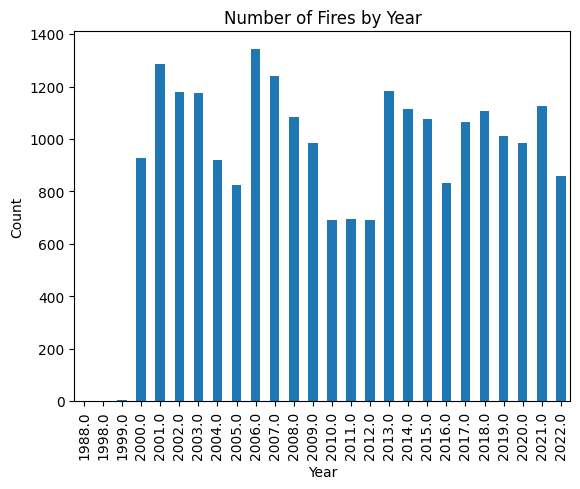

In [ ]:
df['Ign_DateTime'] = pd.to_datetime(df['Ign_DateTime'], errors='coerce')
df['Discover_DateTime'] = pd.to_datetime(df['Discover_DateTime'], errors='coerce')
df['Control_DateTime'] = pd.to_datetime(df['Control_DateTime'], errors='coerce')

df['year'] = df['Ign_DateTime'].dt.year
year_counts = df['year'].value_counts().sort_index()
year_counts.plot(kind='bar')
plt.title('Number of Fires by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

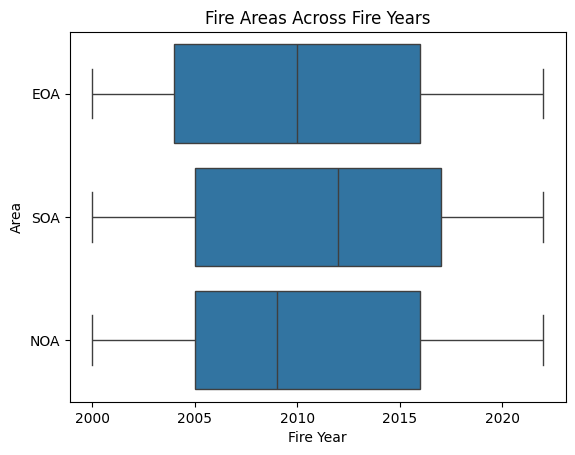

In [ ]:
sns.boxplot(data = df, x = 'FireYear', y='Area')
plt.title('Fire Areas Across Fire Years')
plt.xlabel('Fire Year')
plt.ylabel('Area')
plt.show()

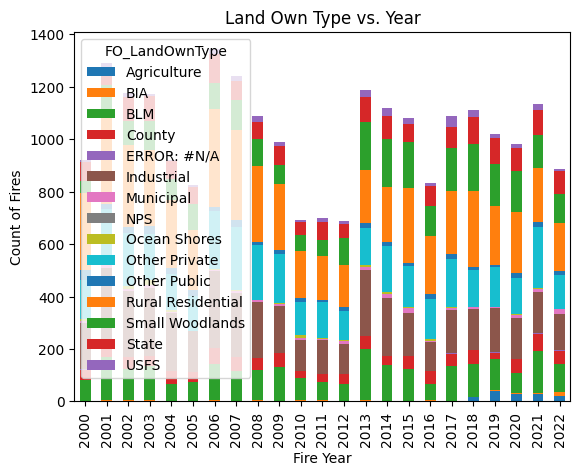

In [ ]:
pd.crosstab(df['FireCategory'], df['FO_LandOwnType'])
ctab = pd.crosstab(df['FireYear'], df['FO_LandOwnType'])
ctab.plot(kind='bar', stacked=True)
plt.title('Land Own Type vs. Year')
plt.xlabel('Fire Year')
plt.ylabel('Count of Fires')
plt.show()

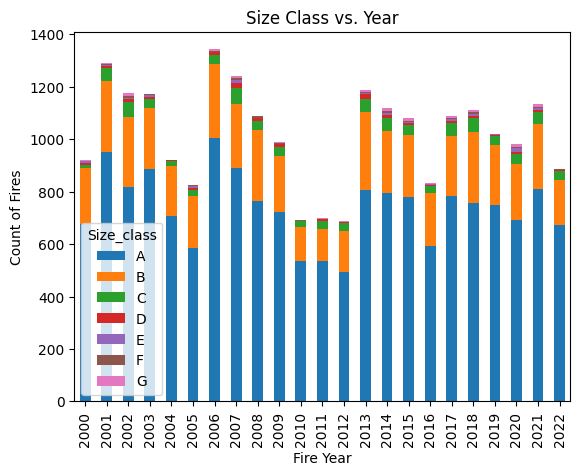

In [ ]:
pd.crosstab(df['FireCategory'], df['Size_class'])
ctab = pd.crosstab(df['FireYear'], df['Size_class'])
ctab.plot(kind='bar', stacked=True)
plt.title('Size Class vs. Year')
plt.xlabel('Fire Year')
plt.ylabel('Count of Fires')
plt.show()

Area

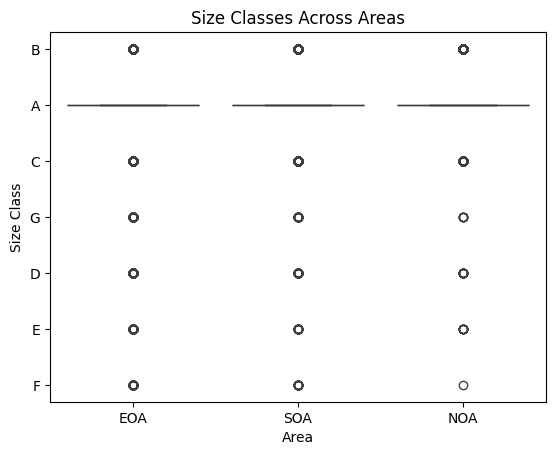

In [ ]:
sns.boxplot(data = df, x = 'Area', y='Size_class')
plt.title('Size Classes Across Areas')
plt.xlabel('Area')
plt.ylabel('Size Class')
plt.show()

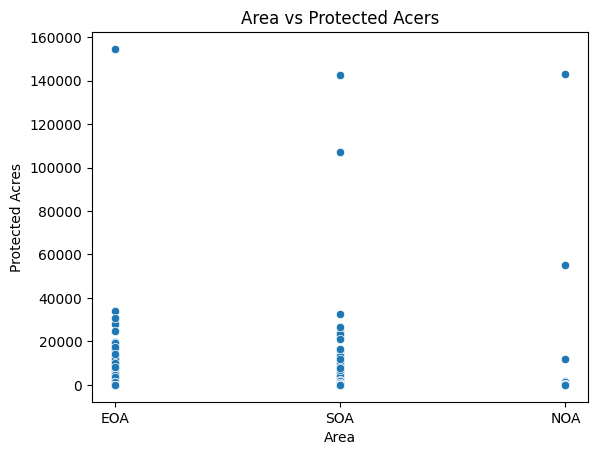

In [ ]:
sns.scatterplot(data = df, x = 'Area', y='Protected_Acres')
plt.title('Area vs Protected Acres')
plt.xlabel('Area')
plt.ylabel('Protected Acres')
plt.show()

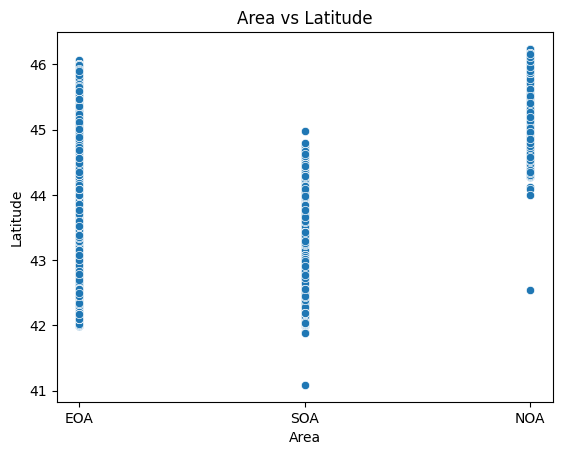

In [ ]:
sns.scatterplot(data = df, x = 'Area', y='Lat_DD')
plt.title('Area vs Latitude')
plt.xlabel('Area')
plt.ylabel('Latitude')
plt.show()

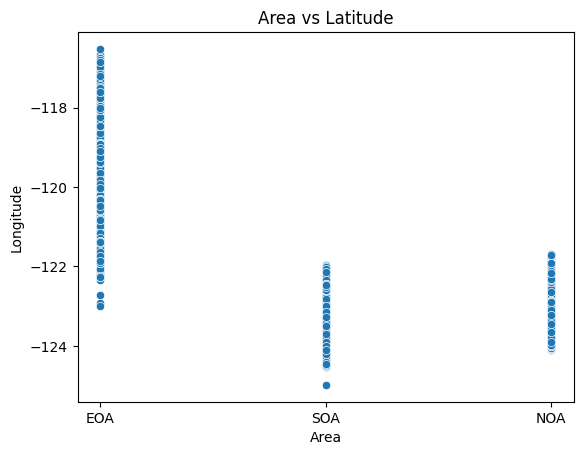

In [ ]:
sns.scatterplot(data = df, x = 'Area', y='Long_DD')
plt.title('Area vs Latitude')
plt.xlabel('Area')
plt.ylabel('Longitude')
plt.show()

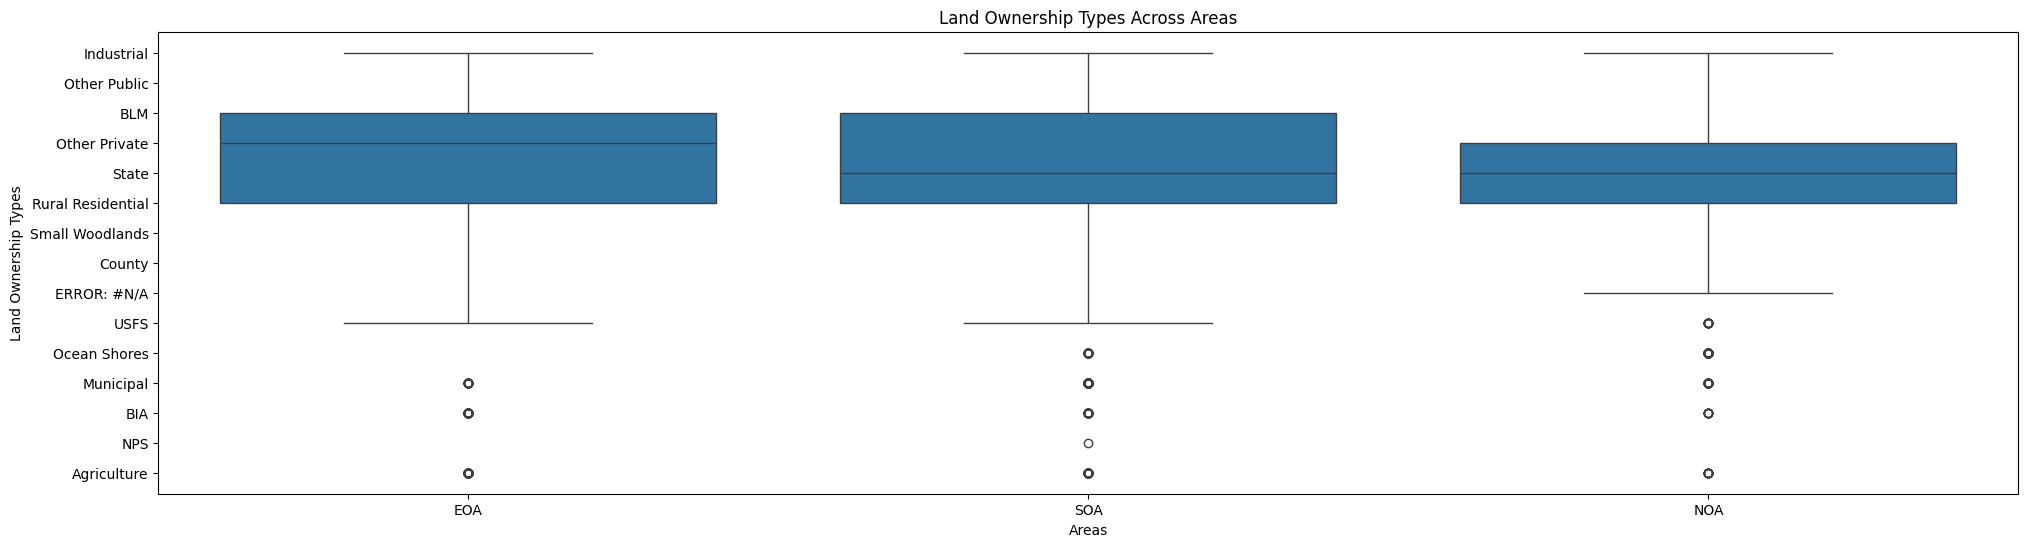

In [ ]:
plt.figure(figsize=(24,6))
sns.boxplot(data = df, x = 'Area', y='FO_LandOwnType')
plt.title('Land Ownership Types Across Areas')
plt.xlabel('Areas')
plt.ylabel('Land Ownership Types')
plt.show()

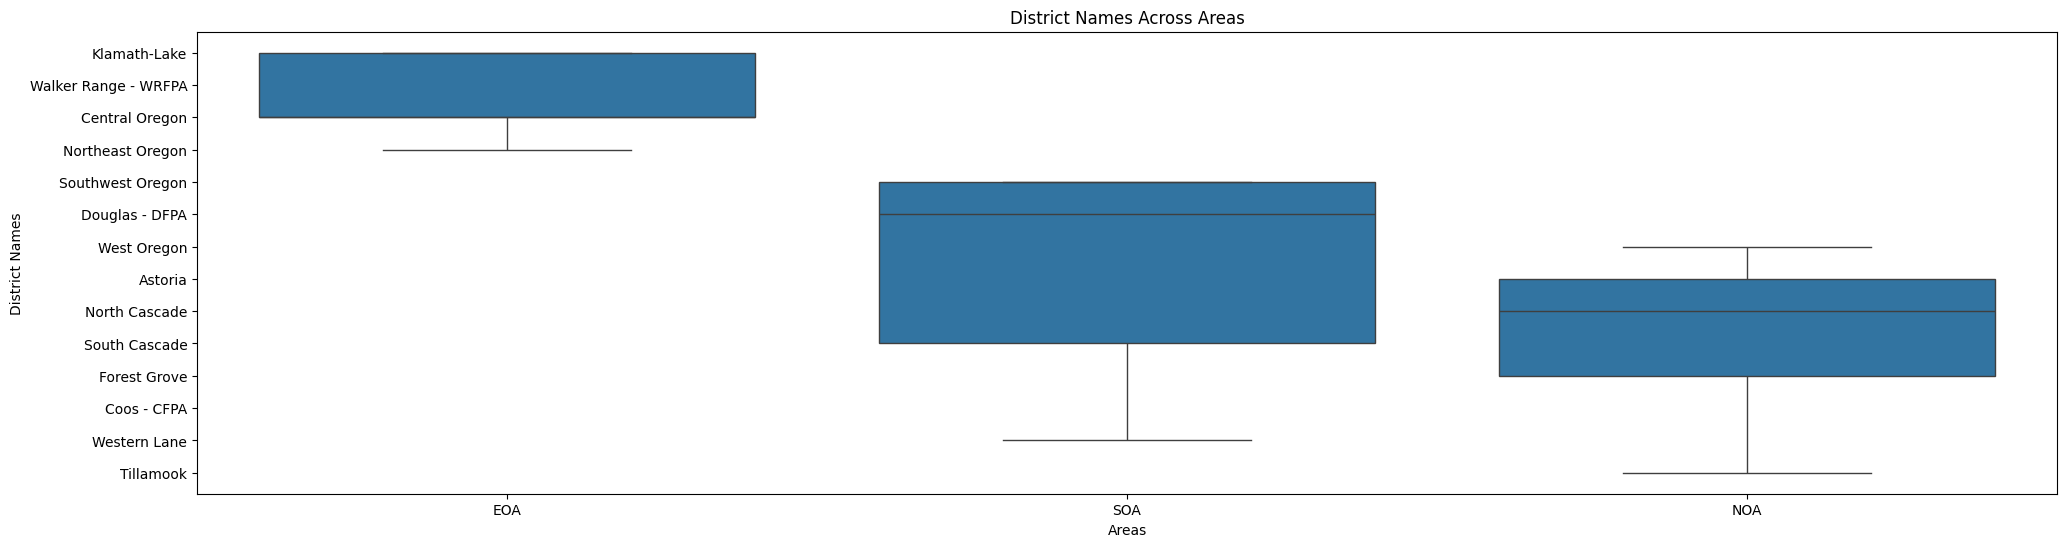

In [ ]:
plt.figure(figsize=(24,6))
sns.boxplot(data = df, x = 'Area', y='DistrictName')
plt.title('District Names Across Areas')
plt.xlabel('Areas')
plt.ylabel('District Names')
plt.show()

Size Class

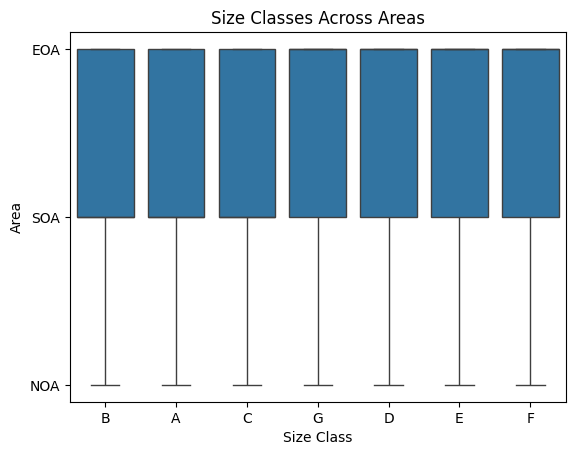

In [ ]:
sns.boxplot(data = df, x = 'Size_class', y='Area')
plt.title('Size Classes Across Areas')
plt.xlabel('Size Class')
plt.ylabel('Area')
plt.show()

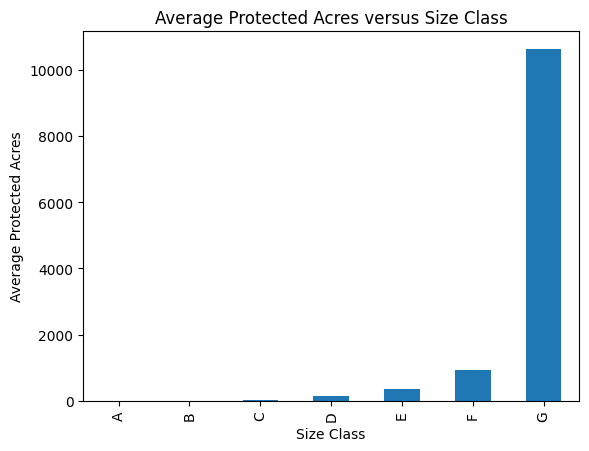

In [ ]:
average_by_size = df.groupby('Size_class')['Protected_Acres'].mean()
average_by_size.plot(kind='bar')
plt.title('Average Protected Acres versus Size Class')
plt.xlabel('Size Class')
plt.ylabel('Average Protected Acres')
plt.show()

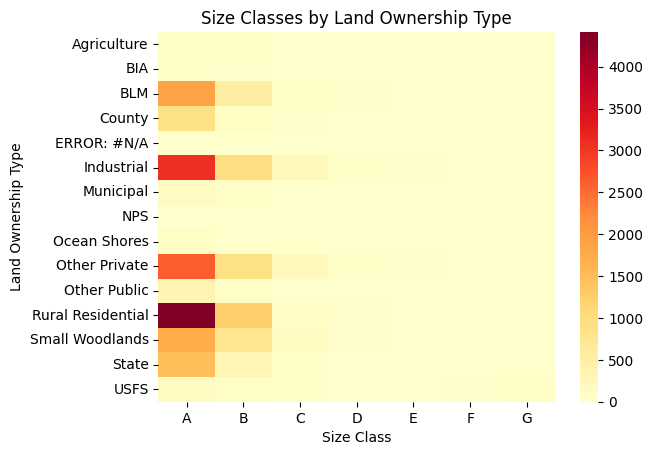

In [ ]:
heatmap_data = pd.crosstab(df['FO_LandOwnType'], df['Size_class'])
sns.heatmap(heatmap_data, cmap='YlOrRd')
plt.title('Size Classes by Land Ownership Type')
plt.xlabel('Size Class')
plt.ylabel('Land Ownership Type')
plt.show()
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

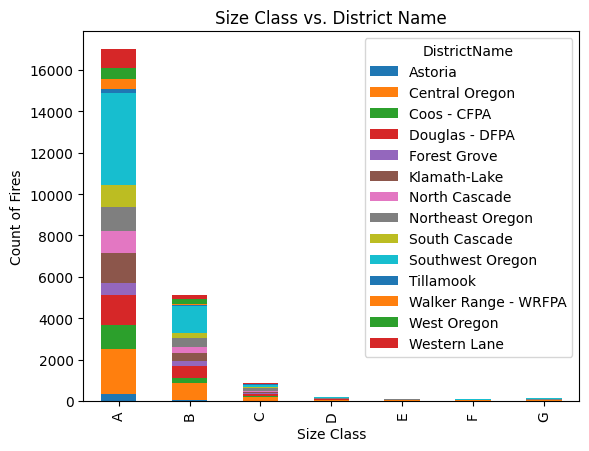

In [ ]:
pd.crosstab(df['FireCategory'], df['DistrictName'])
ctab = pd.crosstab(df['Size_class'], df['DistrictName'])
ctab.plot(kind='bar', stacked=True)
plt.title('Size Class vs. District Name')
plt.xlabel('Size Class')
plt.ylabel('Count of Fires')
plt.show()

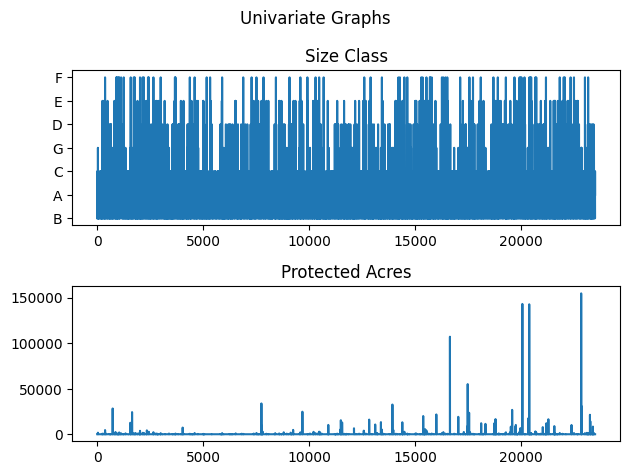

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('Univariate Graphs')
axs[0].plot(df['Size_class'])
axs[0].set_title('Size Class')

axs[1].plot(df['Protected_Acres'])
axs[1].set_title('Protected Acres')

fig.tight_layout()

Protected Acres

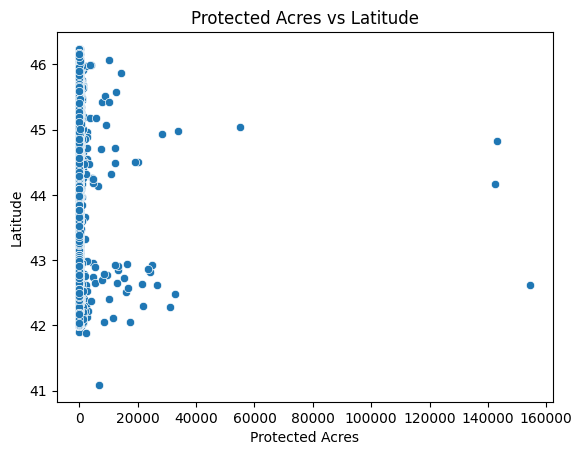

In [ ]:
sns.scatterplot(data = df, x = 'Protected_Acres', y='Lat_DD')
plt.title('Protected Acres vs Latitude')
plt.xlabel('Protected Acres')
plt.ylabel('Latitude')
plt.show()

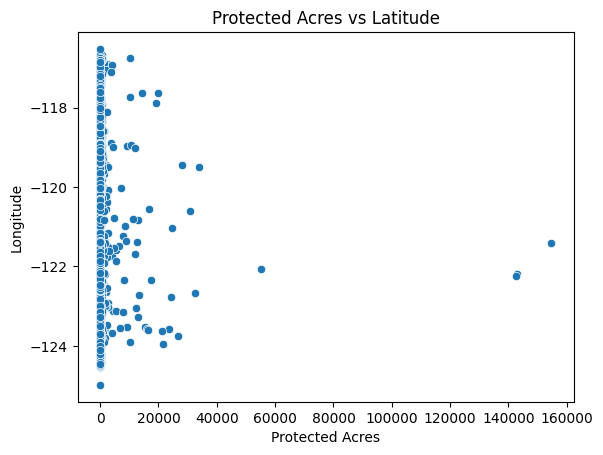

In [ ]:
sns.scatterplot(data = df, x = 'Protected_Acres', y='Long_DD')
plt.title('Protected Acres vs Longitude')
plt.xlabel('Protected Acres')
plt.ylabel('Longitude')
plt.show()

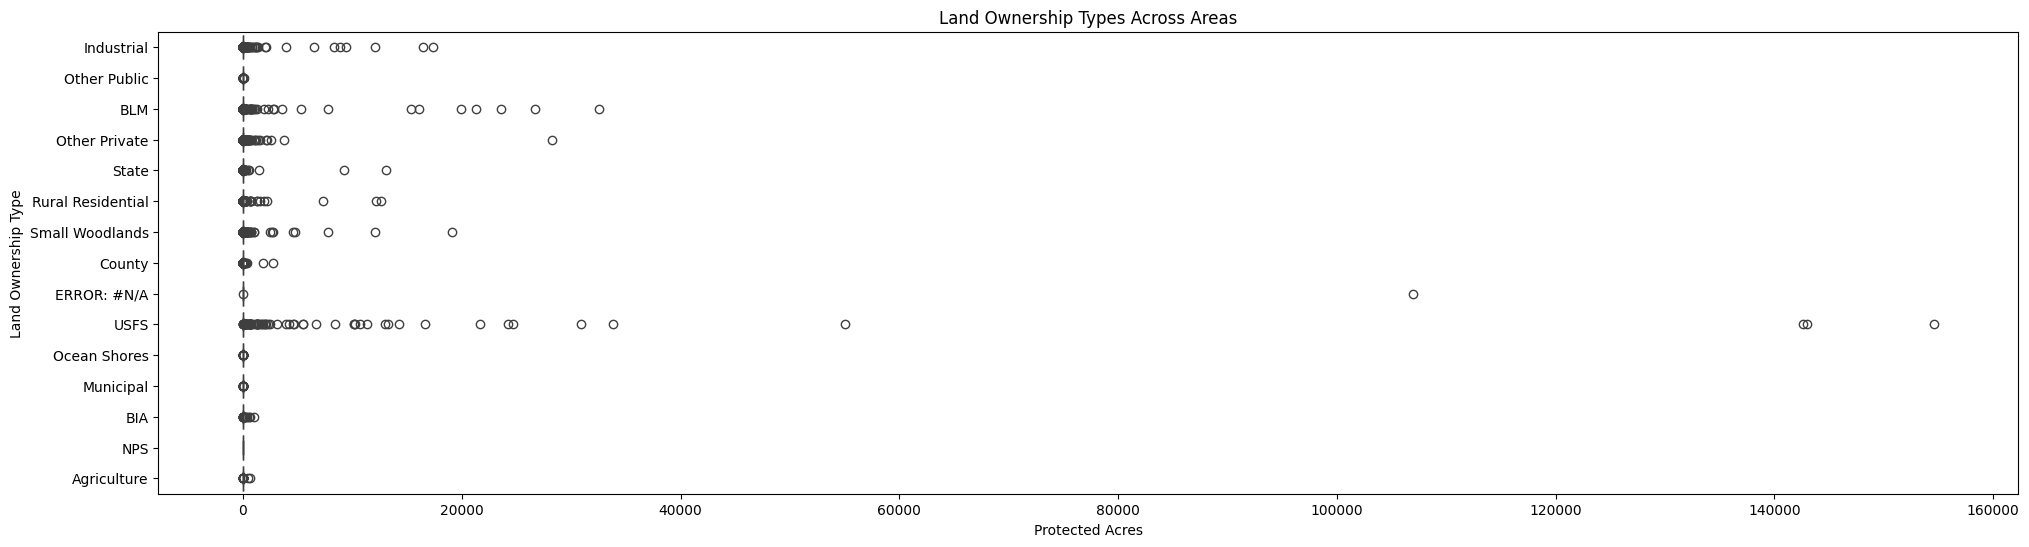

In [ ]:
plt.figure(figsize=(24,6))
sns.boxplot(data = df, x = 'Protected_Acres', y='FO_LandOwnType')
plt.title('Land Ownership Types Across Areas')
plt.xlabel('Protected Acres')
plt.ylabel('Land Ownership Type')
plt.show()

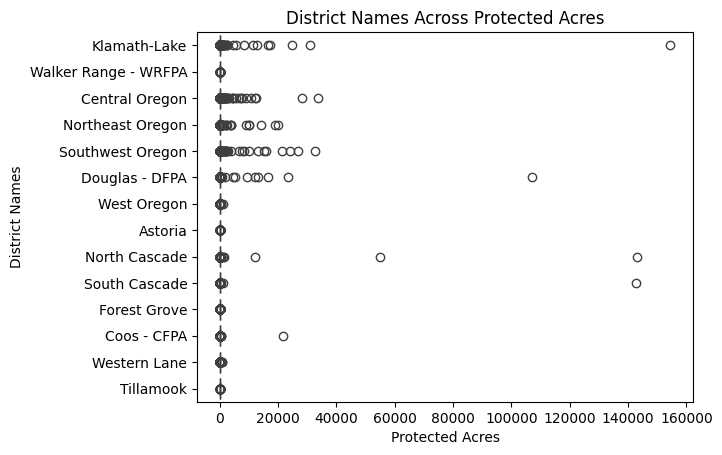

In [ ]:
sns.boxplot(data = df, x = 'Protected_Acres', y='DistrictName')
plt.title('District Names Across Protected Acres')
plt.xlabel('Protected Acres')
plt.ylabel('District Names')
plt.show()

Latitude Longitude

In [ ]:
min_lon, max_lon = df.Long_DD.min(), df.Long_DD.max()
min_lat, max_lat = df.Lat_DD.min(), df.Lat_DD.max()
print('Longitude bounds: {:.5f} {:.5f}'.format(min_lon, max_lon))
print('Latitude bounds: {:.5f} {:.5f}'.format(min_lat, max_lat))
#Sourced from the Homework

Longitude bounds: -124.98361 -116.52111
Latitude bounds: 41.08946 46.23500


/usr/local/lib/python3.11/dist-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


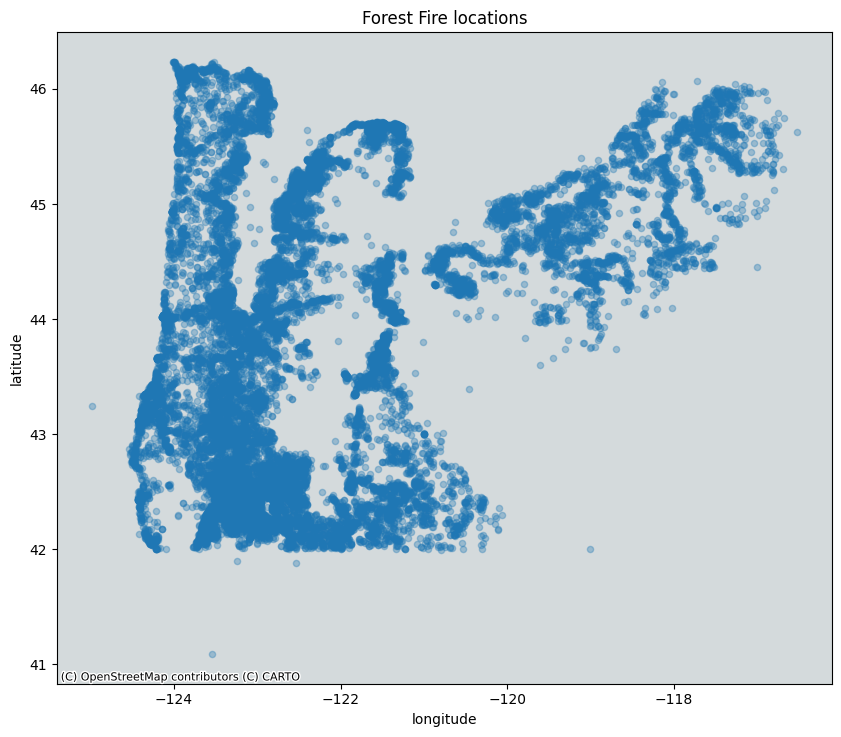

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Long_DD, df.Lat_DD), crs="EPSG:4326")
fig, ax = plt.subplots(1,1,figsize=(10,10))
gdf.plot(ax=ax, markersize=20, marker='o', linewidth=1, alpha=0.33)
ax.set_title('Forest Fire locations')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels)
#Sourced from the Homework

Land Own Type

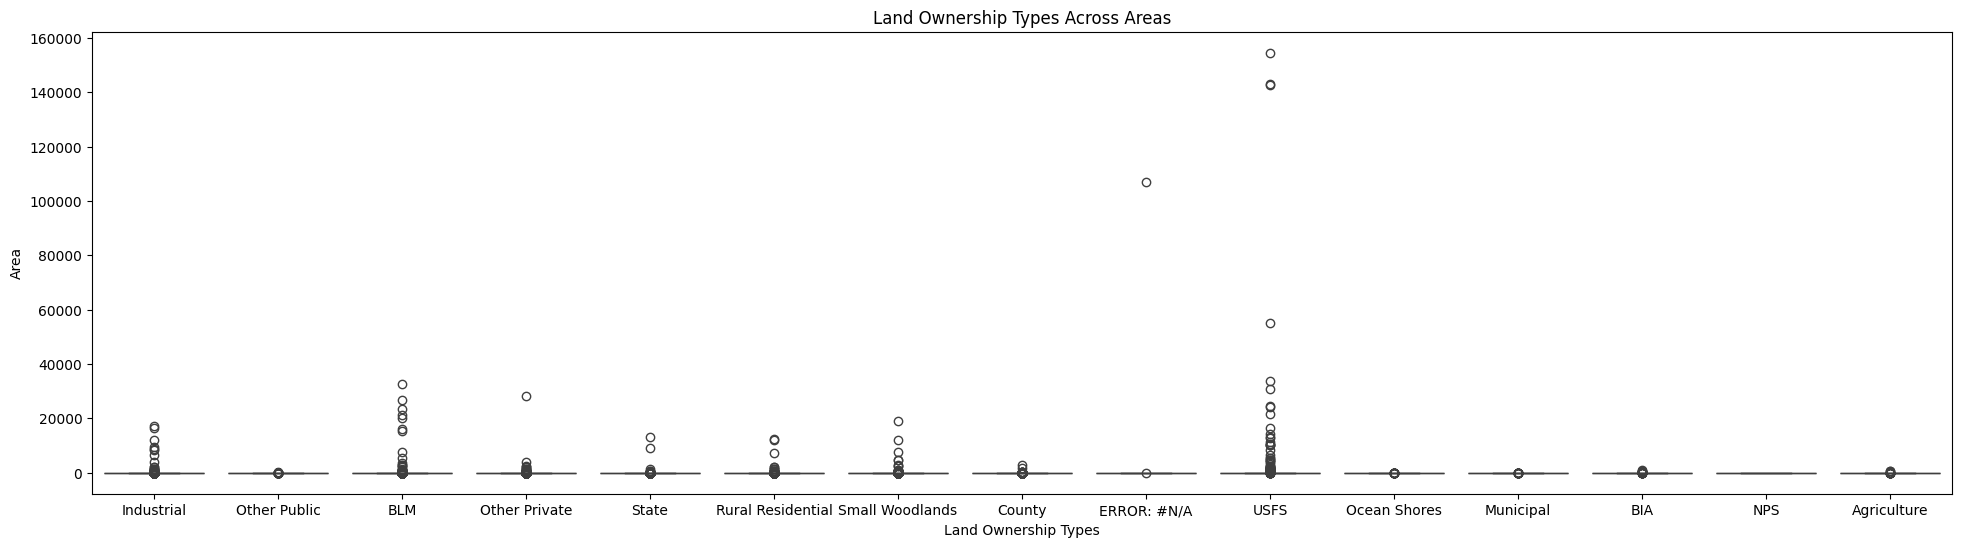

In [ ]:
plt.figure(figsize=(24,6))
sns.boxplot(data = df, x = 'FO_LandOwnType', y='Protected_Acres')
plt.title('Land Ownership Types Across Areas')
plt.xlabel('Land Ownership Types')
plt.ylabel('Area')
plt.show()

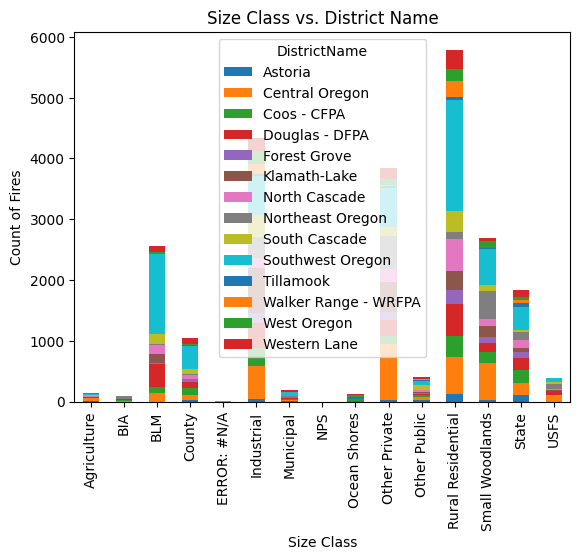

In [ ]:
pd.crosstab(df['FireCategory'], df['DistrictName'])
ctab = pd.crosstab(df['FO_LandOwnType'], df['DistrictName'])
ctab.plot(kind='bar', stacked=True)
plt.title('Land Own Type vs. Fire Count')
plt.xlabel('Land Own type')
plt.ylabel('Count of Fires')
plt.show()

# Target Variable Exploration

We then conducted exploratory data analysis on our potential target variables to look better understand the data distribution of those features. We began by printing the counts of the Human or Lightning feature.

Human Or Lightning

FireCategory
STAT    23490
Name: count, dtype: int64
HumanOrLightning
Human           17197
Lightning        6266
Under Invest       27
Name: count, dtype: int64


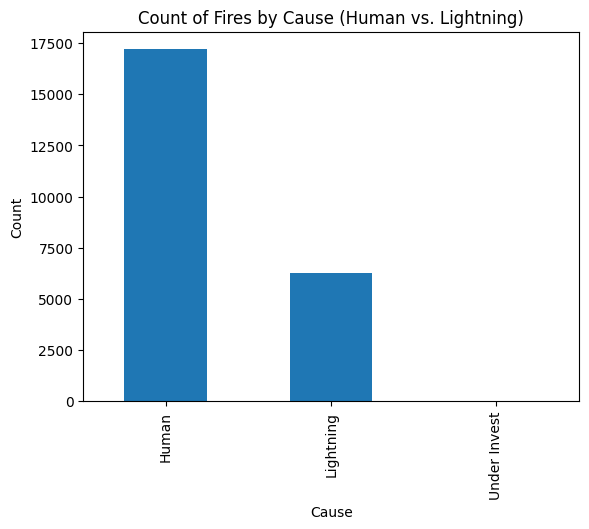

In [ ]:
print(df['FireCategory'].value_counts())
print(df['HumanOrLightning'].value_counts())

df['HumanOrLightning'].value_counts().plot(kind='bar')
plt.title('Count of Fires by Cause (Human vs. Lightning)')
plt.xlabel('Cause')
plt.ylabel('Count')
plt.show()

This plot reveals a class imbalance with a significantly higher number of human forest fire causes (17197) than lightning forest fire causes (6266). This class imbalance will be addressed in the data pre-processing step. We then plotted the distribution of total estimated acres burned between human, lightning and under investigation caused forest fires. To better visualize outliers and the range of wild fires, a log scale is used.

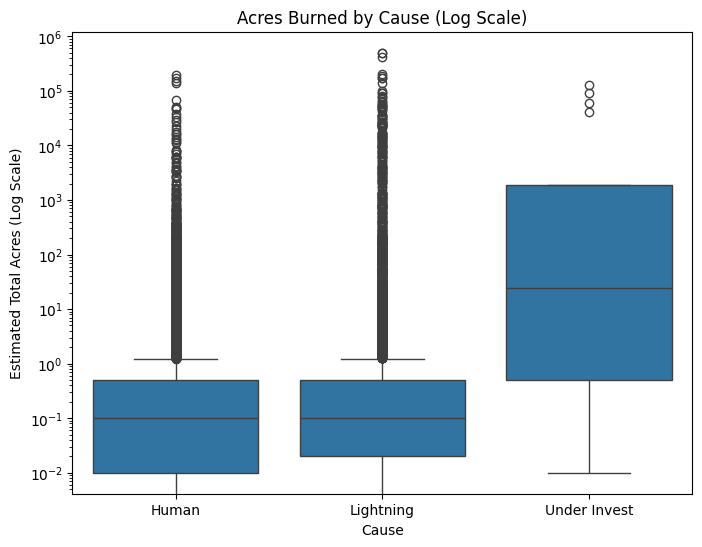

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='HumanOrLightning', y='EstTotalAcres', data=df)
plt.yscale('log')
plt.title('Acres Burned by Cause (Log Scale)')
plt.xlabel('Cause')
plt.ylabel('Estimated Total Acres (Log Scale)')
plt.show()

This shows that most of the fires burn at fairly low acres, with a few outliers for each category. To further investigate this, we created a box plot of the Total Estimated Acres burned.

Estimated Total Acres

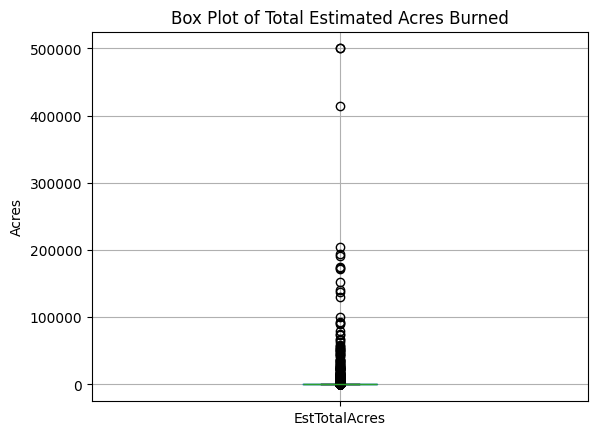

In [ ]:
df.boxplot(column='EstTotalAcres')
plt.title('Box Plot of Total Estimated Acres Burned')
plt.ylabel('Acres')
plt.show()

This plot reveals that the total estimated acres burned has a few outliers that will need to addressed in the data cleaning section. We then printed the distribution of the total estimated acres burned to better understand the data spread.

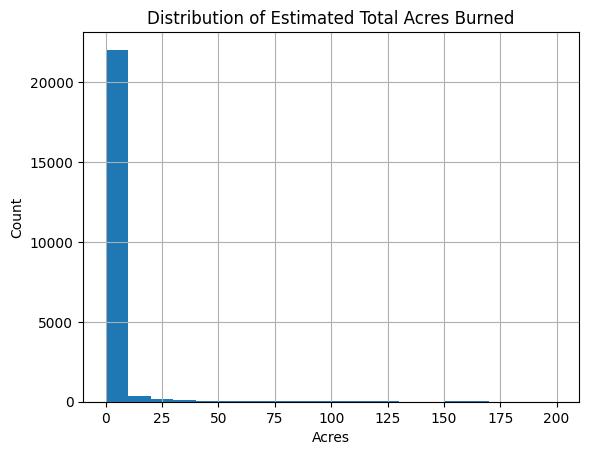

In [ ]:
df['EstTotalAcres'].hist(bins=20, range=(0, 200))
plt.title('Distribution of Estimated Total Acres Burned')
plt.xlabel('Acres')
plt.ylabel('Count')
plt.show()

This plot reveals that total estimated acres burned has a left skewed data distribution, with the majority of the values being between 0 to 25. This data set would likely benefit from the IQR method to best deal with the outliers and skewed data distribution. We then attempted an initial output of what the IQR Method would look like on the original dataset.

In [ ]:
Q1 = df['EstTotalAcres'].quantile(0.25)
Q3 = df['EstTotalAcres'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_nooutliers = df[(df['EstTotalAcres'] >= lower_bound) &
                   (df['EstTotalAcres'] <= upper_bound)]



print(f"Original dataset size: {len(df)}")
print(f"Filtered dataset size: {len(df_nooutliers)}")
print(f"Number of outliers: {len(df) - len(df_nooutliers)}")

Original dataset size: 23490
Filtered dataset size: 19768
Number of outliers: 3722


This method reveals that there are 3722 outliers. We then computed the average acres by cause and the average acres by size class.

In [ ]:
cause_acres = df.groupby('HumanOrLightning')['EstTotalAcres'].mean()
print(cause_acres)

size_class_acres = df.groupby('Size_class')['EstTotalAcres'].mean()
print(size_class_acres)

HumanOrLightning
Human              80.079509
Lightning         742.861787
Under Invest    19097.112353
Name: EstTotalAcres, dtype: float64
Size_class
A        0.075117
B        1.942232
C       33.139075
D      173.359153
E      541.803942
F     2445.056456
G    48532.104516
Name: EstTotalAcres, dtype: float64


The Human caused forest fires average around 80 acres burned, the lightning caused forest fires average around 743 acres burned and the under investigation forest fires average the highest, around 19,097 acres burned. The details of size class are revealed with size class A averaging around 0.08 acres burned, size class B averaging around 1.94 acres burned, size class C averaging around 33 acres burned, size class D averaging around 173 acres burned, size class E averaging around 541 acres burned and size class F averaging around 2445 acres burned and size class G averaging around 48532 acres burned. This helps us understand the difference in damage for human vs lightning forest fires and difference in size classifcations. We then printed the acres burned by cause type.

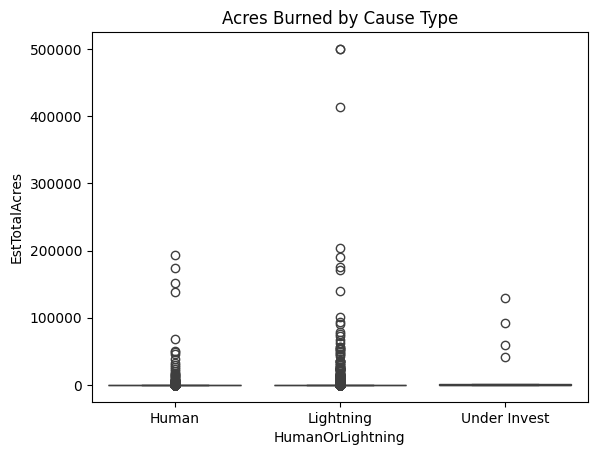

In [ ]:
sns.boxplot(x='HumanOrLightning', y='EstTotalAcres', data=df)
plt.title('Acres Burned by Cause Type')
plt.show()

This plot reveals that the previously discovered outliers for Total Estimated Acres burned fall mainly in the lightning category.

## Data Pre Processing

We first want to eliminate features that do not have enough repetitive observations, are redundant given the existence of another feature with the same purpose, or were irrelevant to our machine learning task. These are the final features and target variables before we initiate our data preprocessing.

In [ ]:
initial_column_selection = [
    'FireYear', 'Area', 'Size_class', 'EstTotalAcres',
    'Protected_Acres', 'HumanOrLightning', 'Lat_DD', 'Long_DD',
    'FO_LandOwnType', 'DistrictName',
    'Ign_DateTime', 'Control_DateTime']

reduced_dataset = df[initial_column_selection]

print(reduced_dataset)

       FireYear Area Size_class  EstTotalAcres  Protected_Acres  \
0          2015  EOA          B           3.20             3.20   
1          2022  EOA          A            NaN             0.20   
2          2000  EOA          B           0.75             0.75   
3          2000  EOA          C          80.00            80.00   
4          2001  SOA          A           0.10             0.10   
...         ...  ...        ...            ...              ...   
23485      2021  EOA          B           0.75             0.75   
23486      2022  SOA          A           0.01             0.01   
23487      2021  EOA          C          67.43            67.43   
23488      2022  EOA          A           0.10             0.00   
23489      2022  EOA          A           0.01             0.01   

      HumanOrLightning    Lat_DD    Long_DD     FO_LandOwnType  \
0                Human  42.13361 -122.04083         Industrial   
1                Human  43.59358 -121.49422       Other Public 

There are 12 features remaining. The remaining features are Fire Year, Area, Size Class, Estimated Total Acres Burned, Protected Acres Burned, Human or Lightning, Latitude, Longitude, Land Ownership Type, District Name, Ignition Date Time and Control Date Time. We then want to address missing values. We need to print the amount of missing values in the reduced dataset.



In [ ]:
print("\nMissing values:")
print(df[initial_column_selection].isnull().sum())


Missing values:
FireYear             0
Area                 0
Size_class           0
EstTotalAcres       79
Protected_Acres      0
HumanOrLightning     0
Lat_DD              10
Long_DD             10
FO_LandOwnType       0
DistrictName         0
Ign_DateTime        94
Control_DateTime    95
dtype: int64


There are 298 missing values in the reduced datset. To address this we will test removing the values against imputting the values with the median. We will first create the dataset that removes missing values.

In [ ]:
remove_miss_df = df[initial_column_selection].dropna(subset=[
    'EstTotalAcres', 'Lat_DD', 'Long_DD',
    'Ign_DateTime', 'Control_DateTime'])

We removed the missing values from the subset of columns, Estimated Total Acres Burned, Latitude, Longitude, Ignition Date Time and Control Date Time. We will then create a datset that imputs the median into missing values. We will first need to check the data types to find the categorical inputs. Our imputting method will only replace numbers with other numbers, so categorial inputs will need to be encoded.

In [ ]:
print(df[initial_column_selection].dtypes)

FireYear                     int64
Area                        object
Size_class                  object
EstTotalAcres              float64
Protected_Acres            float64
HumanOrLightning            object
Lat_DD                     float64
Long_DD                    float64
FO_LandOwnType              object
DistrictName                object
Ign_DateTime        datetime64[ns]
Control_DateTime    datetime64[ns]
dtype: object


The following features are categorical and will need to be encoded: Area, Size Class, Land Ownership Type, and District Name. We will now perform feature extraction on the reduced dataset to ensure Ignition Date Time and Control Date Time have more suitable values. We will extract the Ignition Month and Control Minutes.

In [ ]:
from datetime import datetime
from datetime import date
reduced_dataset['Ign_DateTime'] = pd.to_datetime(
    reduced_dataset['Ign_DateTime'])
reduced_dataset['Ign_Month'] = reduced_dataset['Ign_DateTime'].dt.month
print(reduced_dataset['Ign_Month'])
#https://www.geeksforgeeks.org/get-month-from-date-in-pandas-python/

<ipython-input-13-f66f7276a238>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reduced_dataset['Ign_DateTime'] = pd.to_datetime(


0        9.0
1        NaN
2        7.0
3        8.0
4        8.0
        ... 
23485    6.0
23486    9.0
23487    6.0
23488    8.0
23489    8.0
Name: Ign_Month, Length: 23490, dtype: float64


<ipython-input-13-f66f7276a238>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_dataset['Ign_DateTime'] = pd.to_datetime(
<ipython-input-13-f66f7276a238>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_dataset['Ign_Month'] = reduced_dataset['Ign_DateTime'].dt.month


In [ ]:
reduced_dataset['Control_DateTime'] = pd.to_datetime(
    reduced_dataset['Control_DateTime'])
reduced_dataset['Time_Difference'] = (reduced_dataset[
    'Control_DateTime'] - reduced_dataset['Ign_DateTime']).dt.total_seconds()
reduced_dataset['Control_Minutes'] = reduced_dataset[
    'Time_Difference']/60
print(reduced_dataset['Control_Minutes'])
#https://stackoverflow.com/questions/7852855/in-python-how-do-you-convert-a-datetime-object-to-seconds

<ipython-input-14-a2578e2734d3>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reduced_dataset['Control_DateTime'] = pd.to_datetime(


0          360.0
1            NaN
2         1790.0
3        12480.0
4           50.0
          ...   
23485      358.0
23486       54.0
23487     5748.0
23488       92.0
23489       67.0
Name: Control_Minutes, Length: 23490, dtype: float64


<ipython-input-14-a2578e2734d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_dataset['Control_DateTime'] = pd.to_datetime(
<ipython-input-14-a2578e2734d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_dataset['Time_Difference'] = (reduced_dataset[
<ipython-input-14-a2578e2734d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

We have now extracted the Ignition Month and Control Minutes and added it to the reduced dataset. We will confirm this by printing the column names in the reduced dataset.

In [ ]:
reduced_dataset.columns

Index(['FireYear', 'Area', 'Size_class', 'EstTotalAcres', 'Protected_Acres',
       'HumanOrLightning', 'Lat_DD', 'Long_DD', 'FO_LandOwnType',
       'DistrictName', 'Ign_DateTime', 'Control_DateTime', 'Ign_Month',
       'Time_Difference', 'Control_Minutes'],
      dtype='object')

The column names in the reduced dataset are as expected, so we can move onto other preprocessing steps. We retroactively removed the category "Under Invest[igation]" from the Human Or Lightning column to enable more direct comparisons for precison and recall scores.

In [ ]:
reduced_dataset = reduced_dataset[reduced_dataset[
    'HumanOrLightning'] != 'Under Invest' ]

We then defined the imputer that will replace missing values, more specifically not a number values, with the median. We also removed the rows in Estimated Total Acres with missing values, since imputing should not be conducted on a target feature.

In [ ]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

reduced_dataset = reduced_dataset.dropna(subset = ['EstTotalAcres'])

imputted_columns = reduced_dataset.select_dtypes(include=[np.number]).columns
imp_median_df = imp_median.fit_transform(reduced_dataset[imputted_columns])
#https://scikit-learn.org/stable/modules/impute.html

Our last step before comparison of the imputing versus removing missing values, will be to encode categorical inputs before putting them into the our baseline Random Forest classification and regression model.

In [ ]:
categorical = ['Size_class', 'Area', 'HumanOrLightning',	'FO_LandOwnType',
               'DistrictName']
for category in categorical:
  print(f'{category}: {df[category].unique()}')

Size_class: ['B' 'A' 'C' 'G' 'D' 'E' 'F']
Area: ['EOA' 'SOA' 'NOA']
HumanOrLightning: ['Human' 'Lightning' 'Under Invest']
FO_LandOwnType: ['Industrial' 'Other Public' 'BLM' 'Other Private' 'State'
 'Rural Residential' 'Small Woodlands' 'County' 'ERROR: #N/A' 'USFS'
 'Ocean Shores' 'Municipal' 'BIA' 'NPS' 'Agriculture']
DistrictName: ['Klamath-Lake' 'Walker Range - WRFPA' 'Central Oregon' 'Northeast Oregon'
 'Southwest Oregon' 'Douglas - DFPA' 'West Oregon' 'Astoria'
 'North Cascade' 'South Cascade' 'Forest Grove' 'Coos - CFPA'
 'Western Lane' 'Tillamook']


In [ ]:
size_class_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
reduced_dataset['Size_class_encoded'] = reduced_dataset[
    'Size_class'].map(size_class_mapping)

In [ ]:
reduced_dataset = pd.get_dummies(reduced_dataset, columns=['Area'], prefix='Area')

In [ ]:
reduced_dataset['HumanOrLightning_encoded'] = reduced_dataset[
    'HumanOrLightning'].map({'Human': 0, 'Lightning': 1})

In [ ]:
reduced_dataset = pd.get_dummies(reduced_dataset, columns=[
    'FO_LandOwnType'], prefix='LandType')

In [ ]:
reduced_dataset = pd.get_dummies(reduced_dataset, columns=['DistrictName'], prefix='DistrictName')

We finished the encoding and we need to drop the Ignition Date Time and Control Date Time columns since these are no longer relevant to our analysis.

In [ ]:
reduced_dataset = reduced_dataset.drop(columns=['Ign_DateTime',
                                                'Control_DateTime'])

Our last step is to check the output of our reduced dataset to ensure the intended features remain and the categorical inputs are encoded.

In [ ]:
reduced_dataset.head()

,FireYear,Size_class,EstTotalAcres,Protected_Acres,HumanOrLightning,Lat_DD,Long_DD,Ign_Month,Time_Difference,Control_Minutes,...,DistrictName_Forest Grove,DistrictName_Klamath-Lake,DistrictName_North Cascade,DistrictName_Northeast Oregon,DistrictName_South Cascade,DistrictName_Southwest Oregon,DistrictName_Tillamook,DistrictName_Walker Range - WRFPA,DistrictName_West Oregon,DistrictName_Western Lane
0,2015,B,3.20,3.20,Human,42.13361,-122.04083,9.0,21600.0,360.0,...,False,True,False,False,False,False,False,False,False,False
2,2000,B,0.75,0.75,Lightning,44.91519,-119.28863,7.0,107400.0,1790.0,...,False,False,False,False,False,False,False,False,False,False
3,2000,C,80.00,80.00,Lightning,45.08509,-118.33440,8.0,748800.0,12480.0,...,False,False,False,True,False,False,False,False,False,False
4,2001,A,0.10,0.10,Human,42.53671,-123.21215,8.0,3000.0,50.0,...,False,False,False,False,False,True,False,False,False,False
5,2014,A,0.01,0.01,Lightning,43.45583,-122.74889,8.0,173700.0,2895.0,...,False,False,False,False,False,False,False,False,False,False


The next step is to create an encoded data set that drops the non-encoded versions of the features Size Class and Human Or Lightning.

In [ ]:
encoded_dataset = reduced_dataset.drop(columns=['Size_class', 'HumanOrLightning'])

We are now ready to compare the impact of removing versus imputing missing values on the dataset. We will begin by using a very general Random Forests baseline classification model. We chose to split the data into 90% training and 10% test data. We also decided to remove missing values from the encoded data set rather than the reduced data set.

In [ ]:
from sklearn.model_selection import train_test_split

remove_miss_df = encoded_dataset.dropna(subset=[
    'EstTotalAcres', 'Lat_DD', 'Long_DD', 'HumanOrLightning_encoded'])

X_train_removed, X_test_removed, y_train_removed, y_test_removed = train_test_split(
    remove_miss_df.drop('HumanOrLightning_encoded', axis=1), remove_miss_df['HumanOrLightning_encoded'],
    test_size=0.1, random_state=2025, stratify = remove_miss_df['HumanOrLightning_encoded'])

X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(
    imp_median_df, reduced_dataset['HumanOrLightning'],
    test_size=0.1, random_state=2025, stratify = reduced_dataset['HumanOrLightning'])

We then ran a classification report to understand how each method impacted the initial performance of the model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_removed = RandomForestClassifier(random_state=2025)
rf_removed.fit(X_train_removed, y_train_removed)
y_pred_removed = rf_removed.predict(X_test_removed)
print(classification_report(y_test_removed, y_pred_removed))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1715
           1       0.82      0.76      0.79       625

    accuracy                           0.89      2340
   macro avg       0.87      0.85      0.86      2340
weighted avg       0.89      0.89      0.89      2340



In [ ]:
rf_imputed = RandomForestClassifier(random_state=2025)
rf_imputed.fit(X_train_imputed, y_train_imputed)
y_pred_imputed = rf_imputed.predict(X_test_imputed)
print(classification_report(y_test_imputed, y_pred_imputed))

              precision    recall  f1-score   support

       Human       0.90      0.94      0.92      1715
   Lightning       0.82      0.72      0.77       625

    accuracy                           0.88      2340
   macro avg       0.86      0.83      0.85      2340
weighted avg       0.88      0.88      0.88      2340



Based on these results, we decide to remove missing values for the classification models. The methods of removing them versus imputing them yielded similar results and the more simple approach would be to remove them. However, by removing values, we do have higher potential for bias in the dataset, which will need to be considered later on. We then compared the impact of removing versus imputing values on the dataset using a Random Forests baseline regression model. We once again chose to split the data into 90% training and 10% test data.

In [ ]:
remove_miss_df = encoded_dataset.dropna(subset=[
    'EstTotalAcres', 'Lat_DD', 'Long_DD', 'HumanOrLightning_encoded'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train_removed, X_test_removed, y_train_removed, y_test_removed = train_test_split(
    remove_miss_df.drop('EstTotalAcres', axis = 1), remove_miss_df['EstTotalAcres'], test_size=0.1,
    random_state=2025)

X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(
    imp_median_df, reduced_dataset['EstTotalAcres'],
    test_size=0.1, random_state=2025)

We then found the Root Mean Squared Error to understand how each method impacted the initial performance of the model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_removed = RandomForestRegressor(random_state=2025)
rf_removed.fit(X_train_removed, y_train_removed)
y_pred_removed = rf_removed.predict(X_test_removed)
rmse_removed = np.sqrt(mean_squared_error(y_test_removed,
                                          y_pred_removed ))
print(rmse_removed)

1521.3833415560769


In [ ]:
rf_imputed = RandomForestRegressor(random_state=2025)
rf_imputed.fit(X_train_imputed, y_train_imputed)
y_pred_imputed = rf_imputed.predict(imp_median.transform(X_test_imputed))
rmse_imputed = np.sqrt(mean_squared_error(y_test_imputed,
                                          y_pred_imputed ))
print(rmse_imputed)

1001.7526383259841


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Based on these results, we decided to remove missing values for the regression models. These two methods once again yield similar results, with slightly better results for imputing. We chose the more straight-forward approach, given our decision to emphasize another aspect of pre-processing across all our models, which will be discussed below. We then want to address the outlieres found in the total estimated acres. We defined outliers according to the IQR method based on the class imbalance.

In [ ]:
Q1 = remove_miss_df['EstTotalAcres'].quantile(0.25)
Q3 = remove_miss_df['EstTotalAcres'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

remove_miss_df_nooutliers = remove_miss_df[(remove_miss_df[
    'EstTotalAcres'] >= lower_bound) & (remove_miss_df[
        'EstTotalAcres'] <= upper_bound)]

print(f"Original dataset size: {len(remove_miss_df)}")
print(f"Filtered dataset size: {len(remove_miss_df_nooutliers)}")
print(f"Number of outliers: {len(remove_miss_df) - len(remove_miss_df_nooutliers)}")

Original dataset size: 23392
Filtered dataset size: 19761
Number of outliers: 3631


The number of outliers according to the IQR method is 3631. We will test addressing these by either removing outliers or replacing outliers with the median. We defined the median, standard deviation and the outliers to be replaced. We also included 3 standard deviations to ensure the identification of actual outliers.

In [ ]:
median = remove_miss_df['EstTotalAcres'].median()
std = remove_miss_df['EstTotalAcres'].std()
df_medoutliers = remove_miss_df.copy()

replace_median = (df_medoutliers['EstTotalAcres'] - median).abs() > 3 * std
df_medoutliers.loc[replace_median,'EstTotalAcres']= median

#https://stackoverflow.com/questions/72014709/replace-outliers-from-all-columns-with-mean

Original dataset size: 23392
Filtered dataset size: 23392
Number of outliers: 0


We are now ready to compare the impact of removing versus replacing outliers with the median on the dataset. We will begin by using a very general Random Forests baseline regression model. We chose to split the data into 90% training and 10% test data.

In [ ]:
from sklearn.model_selection import train_test_split

X_train_remov, X_test_remov, y_train_remov, y_test_remov = train_test_split(
    remove_miss_df_nooutliers.drop('EstTotalAcres', axis=1), remove_miss_df_nooutliers[
        'EstTotalAcres'], test_size=0.1,
    random_state=2025)

X_train_replaced, X_test_replaced, y_train_replaced, y_test_replaced = train_test_split(
    df_medoutliers.drop('EstTotalAcres', axis=1), df_medoutliers['EstTotalAcres'],
    test_size=0.1, random_state=2025)

We once again printed the Root Mean Squared Error to understand how each method impacted the initial performance of the model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_remov = RandomForestRegressor()
rf_remov.fit(X_train_remov, y_train_remov)
y_pred_remov = rf_remov.predict(X_test_remov)
rmse_remov = np.sqrt(mean_squared_error(y_test_remov,
                                          y_pred_remov))
print(rmse_remov)

0.02953907462483298


In [ ]:
rf_replaced = RandomForestRegressor(random_state=2025)
rf_replaced.fit(X_train_replaced, y_train_replaced)
y_pred_replaced = rf_replaced.predict(X_test_replaced)
rmse_replaced = np.sqrt(mean_squared_error(y_test_replaced,
                                          y_pred_replaced))
print(rmse_replaced)

1.2049144354147887


These values are fairly different with the removing outliers performing significantly better than the replacing outliers with the median. This could result from genuinely better performance or a potential error with the replacing outliers with the median. However, we chose to remove outliers based on its superior performance. We then want to even out the class imbalance found for Human or Lightning. We plan to attempt undersampling, oversampling, maintaining the original data set, and maintaining the original data set with a class weight to see how this impacts the model. We will first print the percentage of forest fires caused by Lightning.

In [ ]:
len(df_nooutliers[df_nooutliers.HumanOrLightning == 'Lightning'])/len(df_nooutliers)

0.2623431808984217

The percentage of foreset fires caused by lightning is around 26%, which reinforces the fact that our data for that feature is quite imbalanced. We will begin undersampling, where we reduce the number of samples in the majority class to match the size of the minority class.

In [ ]:
df_majority = df_nooutliers[df_nooutliers.HumanOrLightning == 'Human']
df_minority = df_nooutliers[df_nooutliers.HumanOrLightning == 'Lightning']

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

df_balanced_under = pd.concat([df_majority_downsampled, df_minority])

We will then oversample the dataset, where we create additional copies of the minority class to match the size of the majority class.

In [ ]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled])

df_balanced_over = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

We will then print the number of observations in various datasets such as the number of observations for the undersampled set, the oversampled set, etc.

In [ ]:
len(df_nooutliers), len(df_balanced_under), len(df_balanced_over), len(df_majority), len(df_minority), len(df_majority_downsampled)

(19768, 10372, 29152, 14576, 5186, 5186)

We will then print the unique values for the sampling methods to ensure these methods maintained the same categories and encoding.

In [ ]:
print("Over-sampled:")
print(df_filtered_over.Size_class_encoded.unique(), df_filtered_over.Size_class.unique())

print("\nUnder-sampled:")
print(df_filtered_under.Size_class_encoded.unique(), df_filtered_under.Size_class.unique())

print("\nOriginal:")
print(df_filtered_og.Size_class_encoded.unique(), df_filtered_og.Size_class.unique())

Over-sampled:
[1 2] ['A' 'B']

Under-sampled:
[2 1] ['B' 'A']

Original:
[2 1] ['B' 'A']


The categories remain the same. We then printed the number of missing values across each sampling method.

In [ ]:
print("Original:")
print(df_filtered_og.isna().sum().sum())
print(np.round(df_filtered_og.isna().sum().sum()*100/len(df_filtered_og), 2))

print("\nUnder-sampled:")
print(df_filtered_under.isna().sum().sum())
print(np.round(df_filtered_under.isna().sum().sum()*100/len(df_filtered_under), 2))

print("\nOver-sampled:")
print(df_filtered_over.isna().sum().sum())
print(np.round(df_filtered_over.isna().sum().sum()*100/len(df_filtered_over), 2))

Original:
43
0.22

Under-sampled:
10
0.1

Over-sampled:
27
0.09


There are 43 missing values in the original dataset, 10 missing values in the undersampled dataset and 27 missing values in the oversampled dataset. We plan to remove missing values, since we verified which approach for missing values was best. We then dropped missing values and defined our input features and target variables for each sampling method before entering them into our baseline classification model.

In [ ]:
df_filtered_nan_og = df_filtered_og.dropna()
df_filtered_nan_under = df_filtered_under.dropna()
df_filtered_nan_over = df_filtered_over.dropna()

y_og = df_filtered_nan_og['HumanOrLightning_encoded']
X_og = df_filtered_nan_og.drop(columns=[
    'HumanOrLightning',               # original label
    'HumanOrLightning_encoded',       # target (keep it out of features)
    'LatLongDD',                      # duplicate of Lat + Long
    'Ign_DateTime',                   # raw datetime
    'Control_DateTime',               # raw datetime
    'Size_class',
    'CauseBy_Fisherman', 'CauseBy_Hiker', 'CauseBy_Hunter',
    'CauseBy_Lightning', 'CauseBy_Marijuana Grower', 'CauseBy_Motorist',
       'CauseBy_Other Forest Mgt. Worker', 'CauseBy_Other-Landowner Related',
       'CauseBy_Other-Public', 'CauseBy_Public Utility',
       'CauseBy_Rancher-Farmer', 'CauseBy_Recreationist',
       'CauseBy_Ruralist-Non-Paying', 'CauseBy_Ruralist-Paying',
       'CauseBy_Timber Harvest Worker', 'CauseBy_Transient',
       'GeneralCause_Arson', 'GeneralCause_Debris Burning',
       'GeneralCause_Equipment Use', 'GeneralCause_Juveniles',
       'GeneralCause_Lightning', 'GeneralCause_Miscellaneous',
       'GeneralCause_Railroad', 'GeneralCause_Recreation',
       'GeneralCause_Smoking', 'GeneralCause_Under Invest'


])
y_under = df_filtered_nan_under['HumanOrLightning_encoded']
X_under = df_filtered_nan_under.drop(columns=[
    'HumanOrLightning',               # original label
    'HumanOrLightning_encoded',       # target (keep it out of features)
    'LatLongDD',                      # duplicate of Lat + Long
    'Ign_DateTime',                   # raw datetime
    'Control_DateTime',               # raw datetime
    'Size_class',
    'CauseBy_Fisherman', 'CauseBy_Hiker', 'CauseBy_Hunter',
    'CauseBy_Lightning', 'CauseBy_Marijuana Grower', 'CauseBy_Motorist',
       'CauseBy_Other Forest Mgt. Worker', 'CauseBy_Other-Landowner Related',
       'CauseBy_Other-Public', 'CauseBy_Public Utility',
       'CauseBy_Rancher-Farmer', 'CauseBy_Recreationist',
       'CauseBy_Ruralist-Non-Paying', 'CauseBy_Ruralist-Paying',
       'CauseBy_Timber Harvest Worker', 'CauseBy_Transient',
       'GeneralCause_Arson', 'GeneralCause_Debris Burning',
       'GeneralCause_Equipment Use', 'GeneralCause_Juveniles',
       'GeneralCause_Lightning', 'GeneralCause_Miscellaneous',
       'GeneralCause_Railroad', 'GeneralCause_Recreation',
       'GeneralCause_Smoking', 'GeneralCause_Under Invest'


])
y_over = df_filtered_nan_over['HumanOrLightning_encoded']
X_over = df_filtered_nan_over.drop(columns=[
    'HumanOrLightning',               # original label
    'HumanOrLightning_encoded',       # target (keep it out of features)
    'LatLongDD',                      # duplicate of Lat + Long
    'Ign_DateTime',                   # raw datetime
    'Control_DateTime',               # raw datetime
    'Size_class',
    'CauseBy_Fisherman', 'CauseBy_Hiker', 'CauseBy_Hunter',
    'CauseBy_Lightning', 'CauseBy_Marijuana Grower', 'CauseBy_Motorist',
       'CauseBy_Other Forest Mgt. Worker', 'CauseBy_Other-Landowner Related',
       'CauseBy_Other-Public', 'CauseBy_Public Utility',
       'CauseBy_Rancher-Farmer', 'CauseBy_Recreationist',
       'CauseBy_Ruralist-Non-Paying', 'CauseBy_Ruralist-Paying',
       'CauseBy_Timber Harvest Worker', 'CauseBy_Transient',
       'GeneralCause_Arson', 'GeneralCause_Debris Burning',
       'GeneralCause_Equipment Use', 'GeneralCause_Juveniles',
       'GeneralCause_Lightning', 'GeneralCause_Miscellaneous',
       'GeneralCause_Railroad', 'GeneralCause_Recreation',
       'GeneralCause_Smoking', 'GeneralCause_Under Invest'


])
y_over = df_filtered_nan_over['HumanOrLightning_encoded']

The peformance of these sampling methods can be observed in the classification notebook, which provides more insights into the various tested models and the associated outputs.

# Additional Exploratory Data Analysis and Correlation Matrices

After finalizing our data preprocessing, we conducted additional exploratory data analysis to determine if more underlying patterns could be observed. We printed a line graph of the average estimated total acres burned over time, separated into human and lightning caused forest fires.

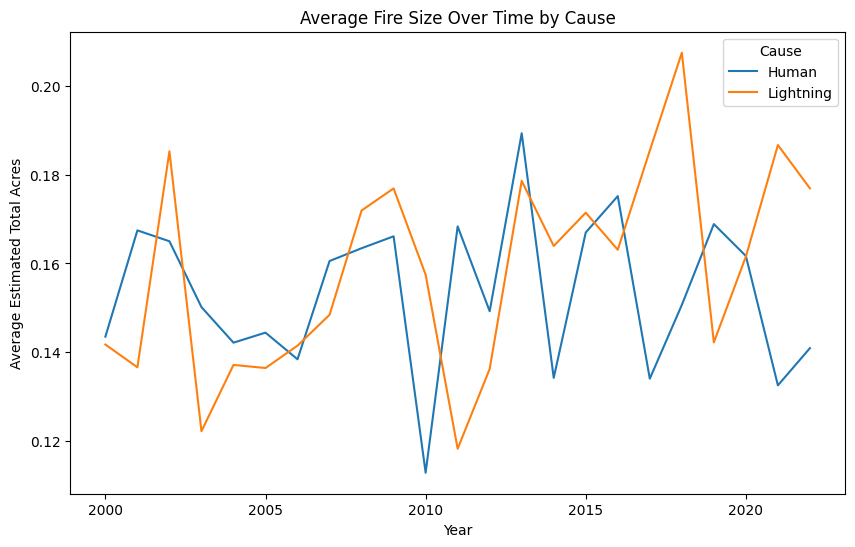

In [ ]:
yearly_avg = df_filtered.groupby(['FireYear', 'HumanOrLightning'])['EstTotalAcres'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_avg, x='FireYear', y='EstTotalAcres', hue='HumanOrLightning')
plt.title('Average Fire Size Over Time by Cause')
plt.xlabel('Year')
plt.ylabel('Average Estimated Total Acres')
plt.legend(title='Cause')
plt.show()

This chart reveals that human and lightning caused forest fires have large fluctuations over time and that the average estimated acres burned for each cause type are pretty similar with a few deviations. We then printed a stacked bar chart to show the occurance of each type of fire each month. This bar chart normalizes the count of fires wihin each class to show the proportion of causes.

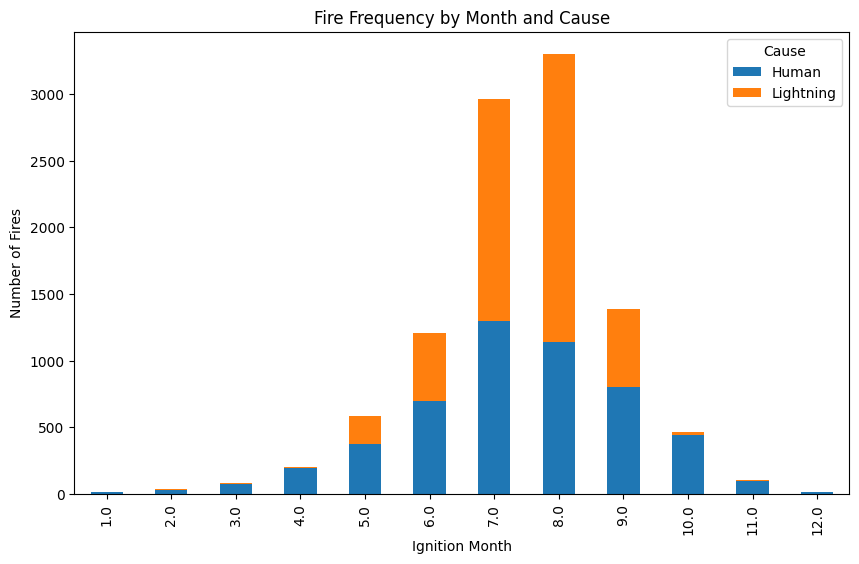

In [ ]:
monthly_counts = df_filtered.groupby(['Ign_Month', 'HumanOrLightning']).size().unstack()

monthly_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Fire Frequency by Month and Cause')
plt.xlabel('Ignition Month')
plt.ylabel('Number of Fires')
plt.legend(title='Cause')
plt.show()

This chart reveals that the months of July and August have the highest number of fires, specifically lightning aused forest fires. This chart also reveals that forest fires are concentrated in late spring, all summer and early fall and have very minimal activity in the winter. We then printed correlation matrices for the features and target variables in our dataset to assess which features were most correlated.

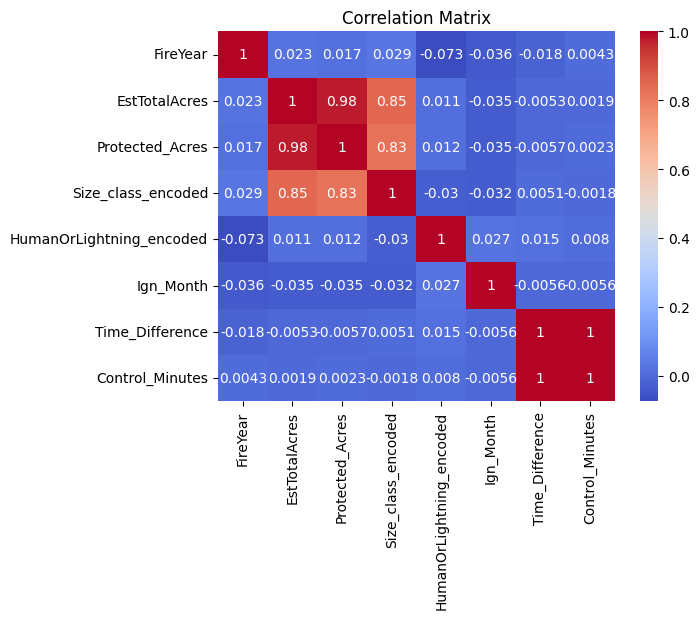

In [ ]:
time_impact_cols = ['FireYear', 'EstTotalAcres', 'Protected_Acres',
              'Size_class_encoded', 'HumanOrLightning_encoded',
              'Ign_Month', 'Time_Difference', 'Control_Minutes']
corr_matrix = df_filtered[time_impact_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

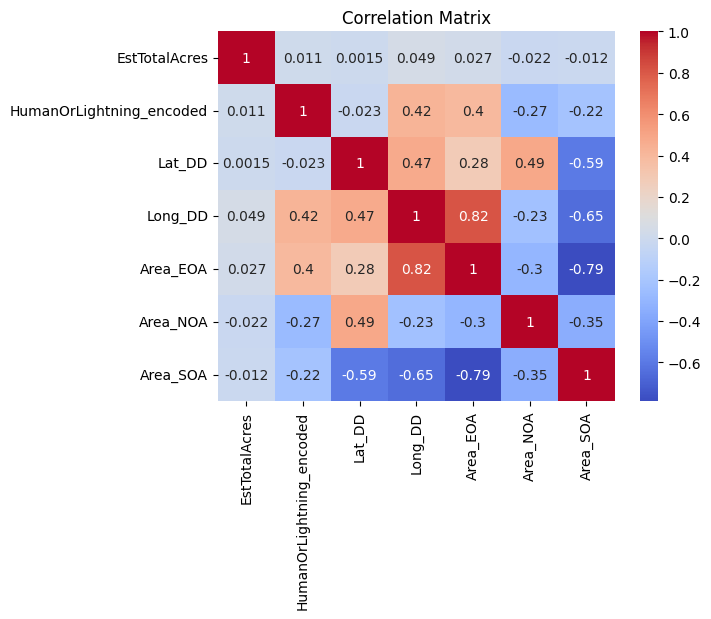

In [ ]:
location_cols = ['EstTotalAcres', 'HumanOrLightning_encoded',
                 'Lat_DD', 'Long_DD', 'Area_EOA',
                 'Area_NOA', 'Area_SOA']
corr_matrix = df_filtered[location_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

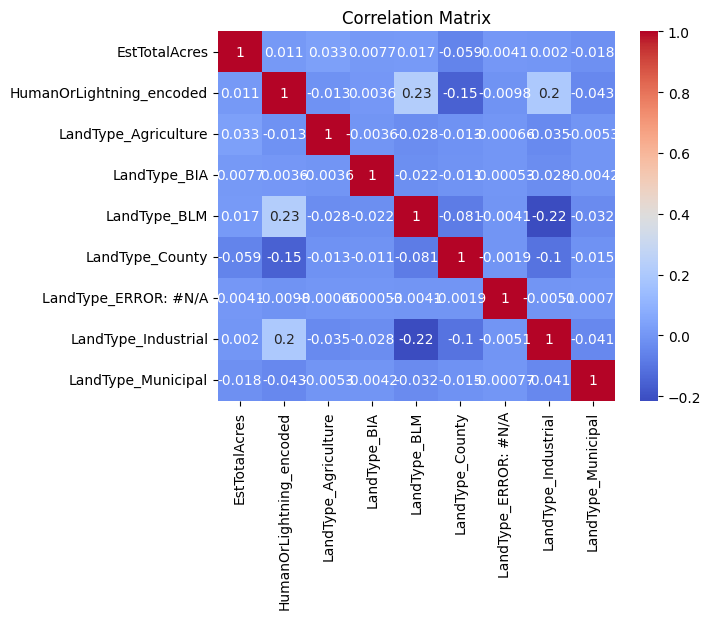

In [ ]:
land_type_one_cols = ['EstTotalAcres', 'HumanOrLightning_encoded',
                  'LandType_Agriculture','LandType_BIA', 'LandType_BLM',
                  'LandType_County', 'LandType_ERROR: #N/A',
                  'LandType_Industrial', 'LandType_Municipal']
corr_matrix = df_filtered[land_type_one_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

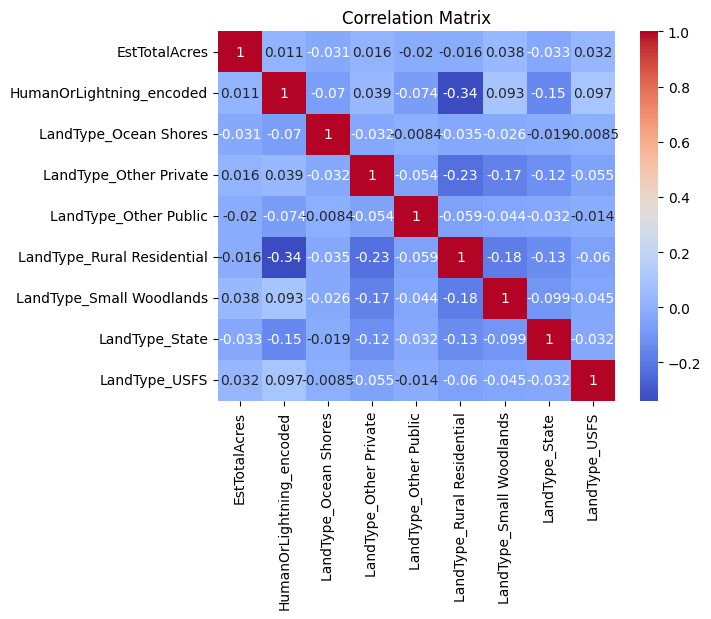

In [ ]:
land_type_two_cols = ['EstTotalAcres', 'HumanOrLightning_encoded',
                  'LandType_Ocean Shores', 'LandType_Other Private',
                  'LandType_Other Public', 'LandType_Rural Residential',
                  'LandType_Small Woodlands', 'LandType_State', 'LandType_USFS']
corr_matrix = df_filtered[land_type_two_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

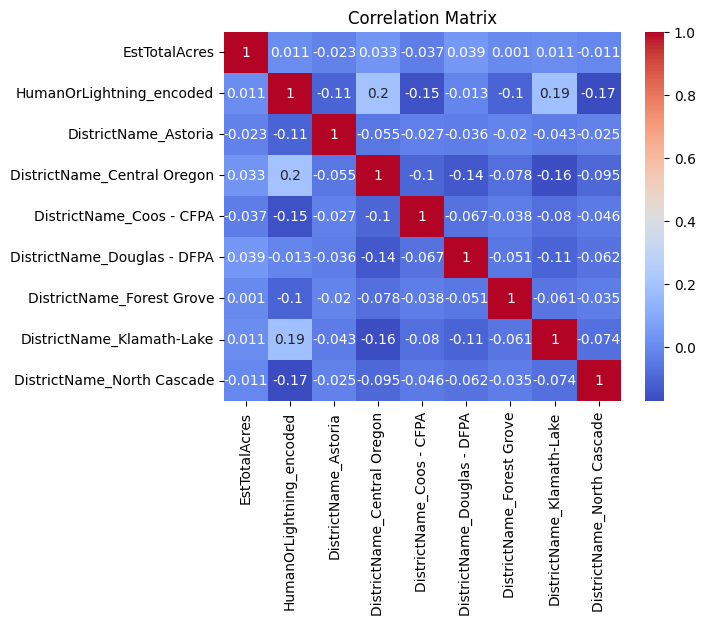

In [ ]:
district_name_one_cols = ['EstTotalAcres', 'HumanOrLightning_encoded',
                  'DistrictName_Astoria', 'DistrictName_Central Oregon',
                  'DistrictName_Coos - CFPA', 'DistrictName_Douglas - DFPA',
                  'DistrictName_Forest Grove', 'DistrictName_Klamath-Lake',
                          'DistrictName_North Cascade']
corr_matrix = df_filtered[district_name_one_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

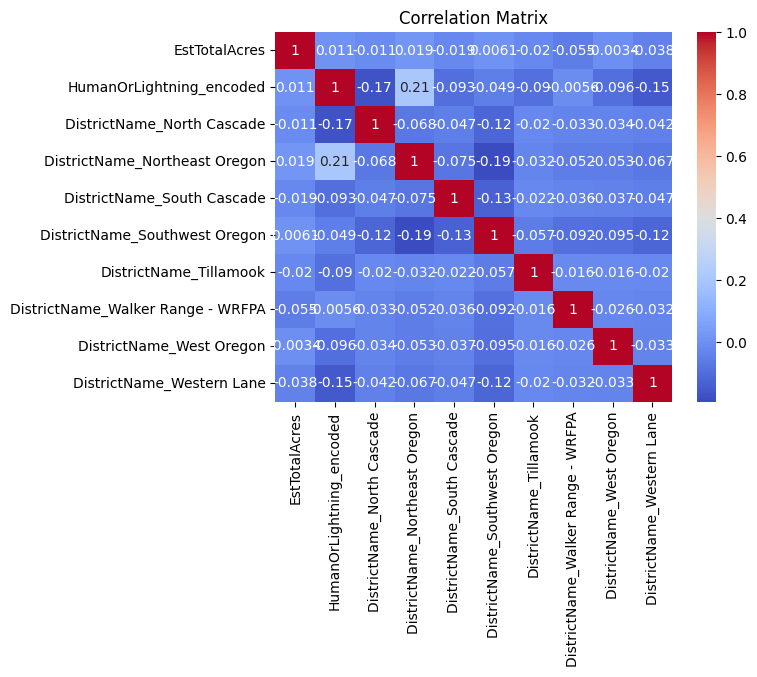

In [ ]:
district_name_two_cols = ['EstTotalAcres', 'HumanOrLightning_encoded',
                  'DistrictName_North Cascade', 'DistrictName_Northeast Oregon',
                 'DistrictName_South Cascade', 'DistrictName_Southwest Oregon',
                  'DistrictName_Tillamook', 'DistrictName_Walker Range - WRFPA',
                      'DistrictName_West Oregon', 'DistrictName_Western Lane']
corr_matrix = df_filtered[district_name_two_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

These matrices reveal that the most correlated features for Human Or Lightning is Longitude and Area EOA and the most correlated features for Total Estimated Acres Burned and Size Class.